In [2]:
file = '/Users/thibautdejean/Downloads/dataverse_files/ALPES_wFLAG_wKT_ANNUALv2016-2021.nc'

In [3]:
import netCDF4 as nc

ds = nc.Dataset(file, mode='r')  # 'r' pour lecture seule

print(ds.dimensions.keys())
print(ds.variables.keys())
x = ds.variables['v2018_2019'][:]
ds.close()

dict_keys(['y', 'x'])
dict_keys(['v2015_2016', 'v2016_2017', 'v2017_2018', 'v2018_2019', 'v2019_2020', 'v2020_2021', 'dir', 'cnt', 'stdev', 'stdeva', 'fmask', 'x', 'y', 'trend2015_2021', 'trend_mask'])


In [4]:
print(type(x[:]))
print(x.shape)

<class 'numpy.ma.core.MaskedArray'>
(6374, 11764)


In [5]:
import numpy as np
data = x[:]
print(data.shape)
if hasattr(data, 'mask'):
    data = np.where(data.mask, 0, data)  # Remplace les valeurs masquées par NaN

#print(data)
print(data.shape)


(6374, 11764)
(6374, 11764)


In [6]:
print(np.max(x))
print(np.size(x))

637.7029
74983736


In [7]:
print(x.shape)

(6374, 11764)


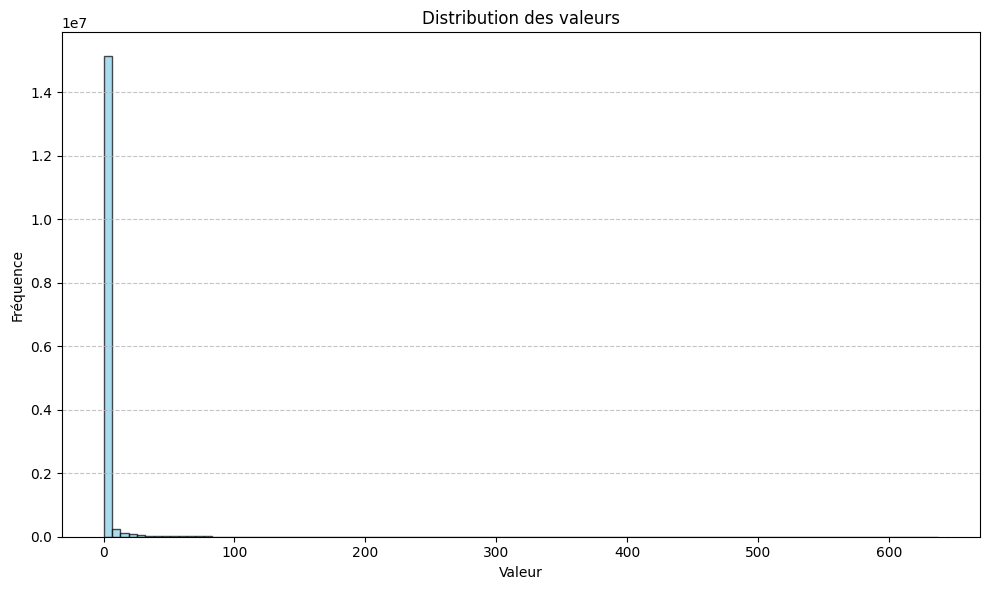

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Créer un tableau d'exemple avec distribution normale

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(x.flatten(), bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des titres et des étiquettes
plt.title('Distribution des valeurs')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75, linestyle='--')

# Afficher l'histogramme
plt.tight_layout()
plt.show()

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_76111/3415146630.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(x), cmap='nipy_spectral', aspect='auto')


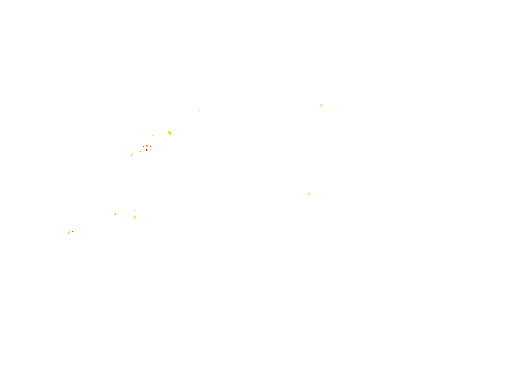

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Afficher la heatmap
plt.imshow(np.log(x), cmap='nipy_spectral', aspect='auto')
plt.gca().invert_yaxis()  # Renverse l'axe Y
plt.gca().set_axis_off()
plt.savefig('/Users/thibautdejean/Documents/alpinemelt.github.io/v_log.png',bbox_inches='tight', pad_inches=0, transparent=True, dpi=1000)
plt.show()

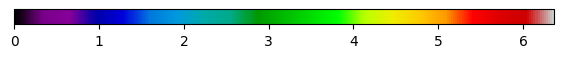

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_76111/2498394814.py:30: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(x), cmap='nipy_spectral', aspect='auto')


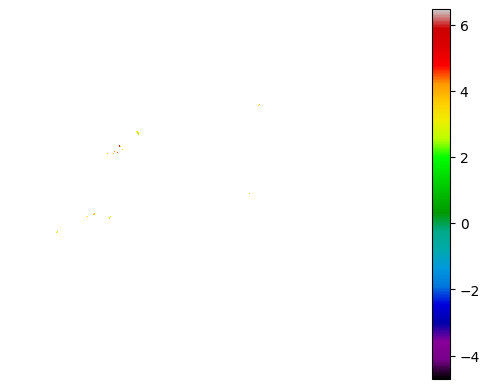

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg

# Créer une figure séparée juste pour la colorbar
fig_cbar = plt.figure(figsize=(6, 0.5))
ax_cbar = fig_cbar.add_axes([0.05, 0.5, 0.9, 0.3])

# Créer un mappable pour la colorbar
norm = plt.Normalize(0, 6.37)
sm = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
sm.set_array([])

# Ajouter la colorbar
cbar = plt.colorbar(sm, cax=ax_cbar, orientation='horizontal')
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'])

# Sauvegarder uniquement la colorbar
plt.savefig('/Users/thibautdejean/Documents/alpinemelt.github.io/colorbar.png', 
            bbox_inches='tight', pad_inches=0.05, transparent=True, dpi=300)

# Afficher et fermer
plt.show()
plt.close(fig_cbar)

# Continuer avec votre plot original si nécessaire
plt.figure()
plt.imshow(np.log(x), cmap='nipy_spectral', aspect='auto')
plt.gca().invert_yaxis()
plt.gca().set_axis_off()
plt.colorbar()
#plt.savefig('/Users/thibautdejean/Documents/alpinemelt.github.io/v_log.png',bbox_inches='tight', pad_inches=0, transparent=True, dpi=1000)
plt.show()

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_77871/4293199246.py:9: RuntimeWarning: divide by zero encountered in log
  im = plt.imshow(np.log(x), cmap='nipy_spectral', aspect='auto')
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_77871/4293199246.py:22: RuntimeWarning: divide by zero encountered in log
  vmin = np.log(x).min()
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_77871/4293199246.py:23: RuntimeWarning: divide by zero encountered in log
  vmax = np.log(x).max()


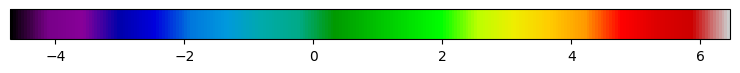

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize
import matplotlib as mpl

# Créer la figure complète d'abord pour référence des couleurs
fig_full = plt.figure()
im = plt.imshow(np.log(x), cmap='nipy_spectral', aspect='auto')
plt.gca().invert_yaxis()
plt.gca().set_axis_off()
plt.close(fig_full)  # Fermer sans afficher

# Créer une figure séparée juste pour la colorbar
fig_cbar = plt.figure(figsize=(8, 1))
ax_cbar = fig_cbar.add_axes([0.05, 0.5, 0.9, 0.3])

# Créer un objet colormap à partir de la chaîne
cmap = plt.get_cmap('nipy_spectral')

# Déterminer les limites de la colorbar basées sur vos données
vmin = np.log(x).min()
vmax = np.log(x).max()
# Ou utiliser des valeurs spécifiques
# vmin, vmax = 0, 6.37

norm = Normalize(vmin=vmin, vmax=vmax)
cb = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal')

# Sauvegarder uniquement la colorbar
plt.savefig('/Users/thibautdejean/Documents/alpinemelt.github.io/colorbar_only.png', 
           bbox_inches='tight', pad_inches=0.05, transparent=True, dpi=300)
plt.show()
plt.close()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize

# Créer une figure pour la colorbar
fig_cbar = plt.figure(figsize=(8, 2))  # Ajuster la hauteur
ax_cbar = fig_cbar.add_axes([0.05, 0.5, 0.9, 0.5])  # Augmenter l'épaisseur

# Créer un objet colormap
cmap = plt.get_cmap('nipy_spectral')

# Déterminer les nouvelles limites (garder vmax inchangé, mais couper vmin à 0)
vmin = max(0, np.log(x).min())  # Empêcher les valeurs négatives
vmax = np.log(x).max()

# Appliquer un normaliseur avec clipping
norm = Normalize(vmin=vmin, vmax=vmax, clip=True)

# Ajouter la colorbar
cb = ColorbarBase(ax_cbar, cmap=cmap, norm=norm, orientation='horizontal', extend='min')

# Augmenter la taille des ticks
cb.ax.tick_params(labelsize=14)

# Sauvegarder uniquement la colorbar
plt.savefig('/Users/thibautdejean/Documents/alpinemelt.github.io/colorbar_only2.png', 
           bbox_inches='tight', pad_inches=0.05, transparent=True, dpi=300)
plt.close()

/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_77871/2667004625.py:14: RuntimeWarning: divide by zero encountered in log
  vmin = max(0, np.log(x).min())  # Empêcher les valeurs négatives
/var/folders/l_/4km91tb53796gmtpqmv98nbr0000gn/T/ipykernel_77871/2667004625.py:15: RuntimeWarning: divide by zero encountered in log
  vmax = np.log(x).max()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates

def lat_to_mercator(lat):
    """ Convertit une latitude en coordonnées Mercator pour Google Maps """
    return np.log(np.tan(np.pi / 4 + np.radians(lat) / 2))

lat_min, lat_max = 44.740708, 47.552342
lon_min, lon_max = 5.951025, 13.606925

height, width = 2000, int(2000 * (lon_max - lon_min) / (lat_max - lat_min))

latitudes = np.linspace(lat_min, lat_max, height)
longitudes = np.linspace(lon_min, lon_max, width)

mercator_y = lat_to_mercator(latitudes)
mercator_y_scaled = (mercator_y - mercator_y.min()) / (mercator_y.max() - mercator_y.min()) * (height - 1)

x = np.random.rand(height, width)  # Remplace par tes données réelles
x[x == 0] = np.nan  # Ignore les zones nulles

#x_transformed = np.sqrt(x)  # Option 1 : Échelle racine carrée
x_transformed = np.log1p(x)  # Option 2 : Échelle logarithmique (si x > 0 uniquement)

vmin = np.nanpercentile(x_transformed, 2)  # Limite basse (2% percentile)
vmax = np.nanpercentile(x_transformed, 98)  # Limite haute (98% percentile)

x_warped = np.zeros_like(x_transformed)
for i in range(width):
    x_warped[:, i] = map_coordinates(x_transformed[:, i], [mercator_y_scaled], order=1, mode='nearest')

fig, ax = plt.subplots(figsize=(width / 200, height / 200), dpi=200)
img = ax.imshow(x_warped, cmap='nipy_spectral', extent=[lon_min, lon_max, lat_min, lat_max], 
                interpolation='nearest', alpha=0.7, vmin=vmin, vmax=vmax)

ax.set_axis_off()
plt.gca().invert_yaxis()
plt.savefig("velocite_t2bis.png", bbox_inches='tight', pad_inches=0, transparent=True, dpi=1000)
plt.close()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ✅ 2. Appliquer une colormap pour la visualisation
cmap = plt.get_cmap('jet')  # Couleurs adaptées aux données scientifiques
normed_data = (x - np.nanmin(x)) / (np.nanmax(x) - np.nanmin(x))  # Normalisation
img_rgba = (cmap(normed_data) * 255).astype(np.uint8)  # Convertir en image RGBA

# ✅ 3. Supprimer les pixels en dehors des glaciers (valeurs nulles → transparent)
img_rgba[x == 0, 3] = 0  # Canal alpha à 0 pour rendre transparent

# ✅ 4. Enregistrer l'image haute résolution
cv2.imwrite("velocite_cv2.png", cv2.cvtColor(img_rgba, cv2.COLOR_RGBA2BGRA))  # Enregistrement sans compression

ModuleNotFoundError: No module named 'cv2'